In [1]:
import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler 


from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from collections import Counter
from sklearn.datasets import make_classification


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support, roc_auc_score



In [2]:
df_1 = pd.read_csv('lendingclub_model.csv', sep = ',')
df_1

,loan_amnt,term,int_rate,annual_inc,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_rec_prncp,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,hardship_flag_N,hardship_flag_Y,loan_status
0,11575.0,36,0.0735,153000.0,0.0,20.0,8550.0,46.0,0.0,11575.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
1,7200.0,36,0.2485,50000.0,0.0,4.0,3560.0,5.0,0.0,7200.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
2,7500.0,36,0.0735,110000.0,0.0,19.0,23348.0,27.0,0.0,7500.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
3,10000.0,60,0.1602,51979.0,0.0,15.0,5733.0,21.0,0.0,10000.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
4,14000.0,36,0.1602,75000.0,1.0,4.0,2700.0,10.0,0.0,14000.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,11575.0,36,0.1559,25400.0,0.0,9.0,18266.0,18.0,0.0,11575.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
462187,12000.0,36,0.1199,63000.0,1.0,13.0,21110.0,61.0,0.0,3847.36,...,0,0,0,0,0,0,0,1,0,Charged Off
462188,13000.0,60,0.1599,35000.0,0.0,9.0,11031.0,22.0,0.0,2527.70,...,0,0,0,0,0,0,0,1,0,Charged Off
462189,12000.0,60,0.1999,64400.0,1.0,17.0,8254.0,20.0,0.0,1552.69,...,0,0,0,0,0,0,0,1,0,Charged Off


In [3]:
df_1['loan_status'].mask(df_1['loan_status'] == 'Fully Paid', 1, inplace=True)
df_1['loan_status'].mask(df_1['loan_status'] != 1, 0, inplace=True)

In [4]:
l = df_1["loan_status"]
np.unique(l)

array([0, 1], dtype=object)

# PREPROCESSING

In [5]:
df=df_1.sample(n=12000, random_state=1234)
scaler = StandardScaler()

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']


y=y.astype('int')
X=X.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# UNDERSAMPLING

In [6]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 8973, 0: 3027})


In [7]:
ros = RandomUnderSampler(random_state=42,sampling_strategy=0.4)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 7567, 0: 3027})


In [8]:
y = y_res.astype('int')
X = X_res.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Random Forest Classifier

El bosque aleatorio, como su nombre lo indica, consiste en una gran cantidad de árboles de decisión individuales que operan como un conjunto . Cada árbol individual en el bosque aleatorio escupe una predicción de clase y la clase con más votos se convierte en la predicción de nuestro modelo.

Un gran número de modelos (árboles) relativamente no correlacionados que operan como un comité superará a cualquiera de los modelos constituyentes individuales.

La razón de este maravilloso efecto es que los árboles se protegen unos a otros de sus errores individuales (siempre que no todos erren constantemente en la misma dirección)

Entonces, los requisitos previos para que el bosque aleatorio funcione bien son:

* Es necesario que haya alguna señal real en nuestras funciones para que los modelos creados con esas funciones funcionen mejor que las adivinanzas al azar.

* Las predicciones (y por lo tanto los errores) realizados por los árboles individuales deben tener bajas correlaciones entre sí

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# SCORING

Confusion matrix, without normalization
[[ 916  104]
 [   0 2477]]
Normalized confusion matrix
[[0.89803922 0.10196078]
 [0.         1.        ]]


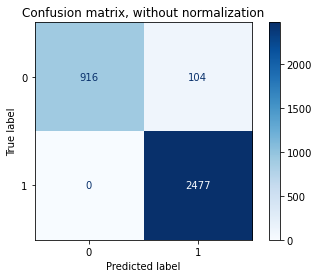

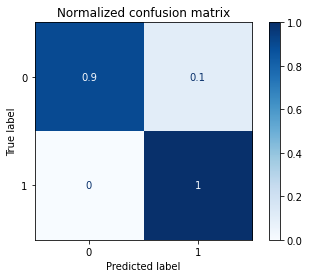

In [10]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [11]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))

Accuracy: 0.9703
AUC: 0.9490
F1-Score: 0.9794

Classification Report                       : 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1020
           1       0.96      1.00      0.98      2477

    accuracy                           0.97      3497
   macro avg       0.98      0.95      0.96      3497
weighted avg       0.97      0.97      0.97      3497



# Pickle

In [ ]:
# Save to file in the current working directory
rf_pkl = "random_forest.pkl"
with open(rf_pkl, 'wb') as file:
    pickle.dump(rf, file)